In [1]:
import numpy as np
from scipy import optimize
from sim.cartpole import CartPoleEnv
from agents.sin_agent import SinAgent
import csv
from pyswarms.single.global_best import GlobalBestPSO
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

In [4]:
def fun(theta, render=False):
    env = CartPoleEnv(swingup=True)
    agent = SinAgent(0.05, 0.3)
    env.x_threshold = 20
    env.masscart = theta[0]
    env.masspole = theta[1]
    env.length = theta[2]
    states = []
    states += [env.reset()]
    if render:
        env.render()
    for _ in range(800):
        states += [env.step(agent.act())[0]]
        if render:
            env.render()
    env.close()
    return np.array(states)

/Users/bastian/miniconda3/envs/ml/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


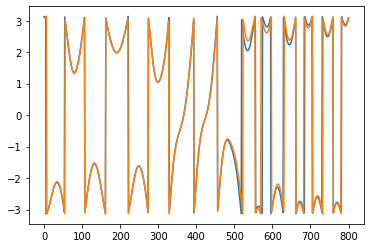

In [6]:
solution_theta = [1.0, 0.1, 0.5]
solution_states = fun(solution_theta)
states = fun(solution_theta)
plt.figure()
plt.plot(states[:,3])
plt.plot(solution_states[:,3])


In [8]:
def loss_(theta):
    states = fun(theta)
    delta_phi = (solution_states[:,[3]] - states[:,[3]]) % (2 * np.pi)
    delta_phi = np.minimum(delta_phi, 2*np.pi - delta_phi)**2
    return (solution_states[:,[0]] - states[:,[0]])**2 + delta_phi

def loss(theta):
    if isinstance(theta[0], float):
        return np.sum(loss_(theta))
    else:
        losses = []
        for t in theta:
            losses += [np.sum(loss(t))]
        return losses

In [9]:
print(loss(solution_theta))
guess = [0.9, 0.2, 0.4]
result = optimize.least_squares(loss, guess, verbose=2)
print(result)

/Users/bastian/miniconda3/envs/ml/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


51.516234627004195
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.8595e+06                                    8.91e+13    
       1              2         1.2356e+06      6.24e+05       1.00e+00       6.03e+13    
       2              6         1.2326e+06      3.05e+03       3.93e-03       5.59e+13    
       3              7         7.2486e+05      5.08e+05       9.81e-04       6.75e+13    
       4             10         6.7888e+05      4.60e+04       1.53e-05       1.07e+14    
       5             15         6.7888e+05      0.00e+00       0.00e+00       1.07e+14    
`xtol` termination condition is satisfied.
Function evaluations 15, initial cost 1.8595e+06, final cost 6.7888e+05, first-order optimality 1.07e+14.
 active_mask: array([0., 0., 0.])
        cost: 678879.0596184048
         fun: array([1165.22878407])
        grad: array([4.67770273e+13, 1.07198928e+14, 1.01224821e+14])
         jac: array([[

In [10]:
bounds = ([0.7, 0.05, 0.3], [1.5, 0.2, 0.7])
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=10, dimensions=3, options=options, bounds=bounds)
cost, pos = optimizer.optimize(loss, 200)

2020-03-23 16:23:42,754 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=0.142
2020-03-23 16:25:36,206 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.1417902172826433, best pos: [1.18935459 0.09024463 0.49989299]


/Users/bastian/miniconda3/envs/ml/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


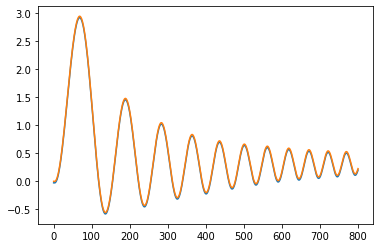

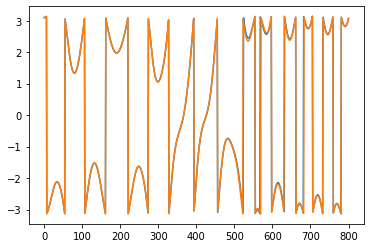

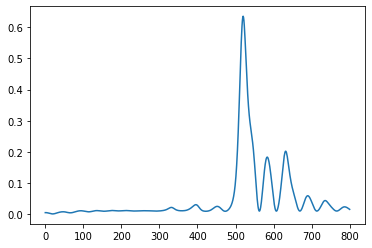

In [13]:
states = fun(pos)
plt.figure()
plt.plot(states[:,0])
plt.plot(solution_states[:,0])
plt.figure()
plt.plot(states[:,3])
plt.plot(solution_states[:,3])
plt.figure()
plt.plot(loss_(pos))

In [15]:
result = optimize.least_squares(loss, [1.0, 0.1, 0.5])
print(result)

 active_mask: array([0., 0., 0.])
        cost: 266.908702389784
         fun: array([23.10448884])
        grad: array([6.57202254e+09, 1.06588427e+10, 2.24087870e+11])
         jac: array([[2.84447866e+08, 4.61332116e+08, 9.69888887e+09]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 16
        njev: 2
  optimality: 224087869672.62143
      status: 3
     success: True
           x: array([1.05948422, 0.06925954, 0.52094103])


In [19]:
print(loss(pos), loss(result.x))

3.5957998680661767 45.70273755526952


In [63]:
actions = []
x = []
angle = []
with open('memory.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        x += [float(row[1])]
        angle += [float(row[3])]
        actions += [float(row[5])]

In [64]:
def fun2(theta, render=False):
    env = CartPoleEnv(swingup=True)
    
    env.x_threshold = 20
    env.masscart = theta[0]
    env.masspole = theta[1]
    env.length = theta[2]
    env.mu_cart = theta[3]
    env.mu_pole = theta[4]
    
    env.Psi = theta[5]
    env.R = theta[6]
    env.L = theta[7]
    env.J_rotor = theta[8]
    
    states = []
    states += [env.reset()]
    if render:
        env.render()
    for i in range(len(x)):
        states += [env.step([np.sign(actions[i])])[0]]
        if render:
            env.render()
    env.close()
    return np.array(states)

In [65]:
def loss2_(theta):
    states = fun(theta)
    delta_phi = (angle - states[:,[3]]) % (2 * np.pi)
    delta_phi = np.minimum(delta_phi, 2*np.pi - delta_phi)**2
    return (x - states[:,[0]])**2 + delta_phi

def loss2(theta):
    losses = []
    for t in theta:
        losses += [np.sum(loss2_(t))]
    return losses


In [68]:
bounds = ([0.1, 0.01, 0.1, 0, 0, 0.01, 0.5, 0.001, 0.01], 
          [1.0, 0.4, 0.3, 3, 0.1, 0.5, 10, 0.1, 0.3])
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=30, dimensions=9, options=options, bounds=bounds)
cost, pos = optimizer.optimize(loss2, 500)

2020-03-23 17:50:58,745 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}







pyswarms.single.global_best:   0%|          |0/500/Users/bastian/miniconda3/envs/ml/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))







pyswarms.single.global_best:   0%|          |0/500, best_cost=3.25e+6






pyswarms.single.global_best:   0%|          |1/500, best_cost=3.25e+6






pyswarms.single.global_best:   0%|          |1/500, best_cost=3.24e+6






pyswarms.single.global_best:   0%|          |2/500, best_cost=3.24e+6






pyswarms.single.global_best:   0%|          |2/500, best_cost=3.24e+6






pyswarms.single.global_best:   1%|          |3/500, best_cost=3.24e+6






pyswarms.single.global_best:   1%|          |3/500, best_cost=3.24e+6






pyswarms.single.global_best:   1%|          |4/500, best_cost=3.

pyswarms.single.global_best:   8%|▊         |40/500, best_cost=3.14e+6






pyswarms.single.global_best:   8%|▊         |40/500, best_cost=3.14e+6






pyswarms.single.global_best:   8%|▊         |41/500, best_cost=3.14e+6






pyswarms.single.global_best:   8%|▊         |41/500, best_cost=3.14e+6






pyswarms.single.global_best:   8%|▊         |42/500, best_cost=3.14e+6






pyswarms.single.global_best:   8%|▊         |42/500, best_cost=3.14e+6






pyswarms.single.global_best:   9%|▊         |43/500, best_cost=3.14e+6






pyswarms.single.global_best:   9%|▊         |43/500, best_cost=3.14e+6






pyswarms.single.global_best:   9%|▉         |44/500, best_cost=3.14e+6






pyswarms.single.global_best:   9%|▉         |44/500, best_cost=3.14e+6






pyswarms.single.global_best:   9%|▉         |45/500, best_cost=3.14e+6






pyswarms.single.global_best:   9%|▉         |45/500, best_cost=3.14e+6






pyswarms.single.global_best:   9%|▉         |46/500, best_cost=3.14e+6







pyswarms.single.global_best:  16%|█▌        |81/500, best_cost=3.14e+6






pyswarms.single.global_best:  16%|█▋        |82/500, best_cost=3.14e+6






pyswarms.single.global_best:  16%|█▋        |82/500, best_cost=3.14e+6






pyswarms.single.global_best:  17%|█▋        |83/500, best_cost=3.14e+6






pyswarms.single.global_best:  17%|█▋        |83/500, best_cost=3.14e+6






pyswarms.single.global_best:  17%|█▋        |84/500, best_cost=3.14e+6






pyswarms.single.global_best:  17%|█▋        |84/500, best_cost=3.14e+6






pyswarms.single.global_best:  17%|█▋        |85/500, best_cost=3.14e+6






pyswarms.single.global_best:  17%|█▋        |85/500, best_cost=3.14e+6






pyswarms.single.global_best:  17%|█▋        |86/500, best_cost=3.14e+6






pyswarms.single.global_best:  17%|█▋        |86/500, best_cost=3.14e+6






pyswarms.single.global_best:  17%|█▋        |87/500, best_cost=3.14e+6






pyswarms.single.global_best:  17%|█▋        |87/500, best_cost=3.14e+6







pyswarms.single.global_best:  25%|██▍       |123/500, best_cost=3.14e+6






pyswarms.single.global_best:  25%|██▍       |123/500, best_cost=3.14e+6






pyswarms.single.global_best:  25%|██▍       |124/500, best_cost=3.14e+6






pyswarms.single.global_best:  25%|██▍       |124/500, best_cost=3.14e+6






pyswarms.single.global_best:  25%|██▌       |125/500, best_cost=3.14e+6






pyswarms.single.global_best:  25%|██▌       |125/500, best_cost=3.14e+6






pyswarms.single.global_best:  25%|██▌       |126/500, best_cost=3.14e+6






pyswarms.single.global_best:  25%|██▌       |126/500, best_cost=3.14e+6






pyswarms.single.global_best:  25%|██▌       |127/500, best_cost=3.14e+6






pyswarms.single.global_best:  25%|██▌       |127/500, best_cost=3.14e+6






pyswarms.single.global_best:  26%|██▌       |128/500, best_cost=3.14e+6






pyswarms.single.global_best:  26%|██▌       |128/500, best_cost=3.14e+6






pyswarms.single.global_best:  26%|██▌       |129/500, best_cost=

pyswarms.single.global_best:  33%|███▎      |164/500, best_cost=3.14e+6






pyswarms.single.global_best:  33%|███▎      |164/500, best_cost=3.14e+6






pyswarms.single.global_best:  33%|███▎      |165/500, best_cost=3.14e+6






pyswarms.single.global_best:  33%|███▎      |165/500, best_cost=3.14e+6






pyswarms.single.global_best:  33%|███▎      |166/500, best_cost=3.14e+6






pyswarms.single.global_best:  33%|███▎      |166/500, best_cost=3.14e+6






pyswarms.single.global_best:  33%|███▎      |167/500, best_cost=3.14e+6






pyswarms.single.global_best:  33%|███▎      |167/500, best_cost=3.14e+6






pyswarms.single.global_best:  34%|███▎      |168/500, best_cost=3.14e+6






pyswarms.single.global_best:  34%|███▎      |168/500, best_cost=3.14e+6






pyswarms.single.global_best:  34%|███▍      |169/500, best_cost=3.14e+6






pyswarms.single.global_best:  34%|███▍      |169/500, best_cost=3.14e+6






pyswarms.single.global_best:  34%|███▍      |170/500, best_cost=

pyswarms.single.global_best:  41%|████      |205/500, best_cost=3.14e+6






pyswarms.single.global_best:  41%|████      |205/500, best_cost=3.14e+6






pyswarms.single.global_best:  41%|████      |206/500, best_cost=3.14e+6






pyswarms.single.global_best:  41%|████      |206/500, best_cost=3.14e+6






pyswarms.single.global_best:  41%|████▏     |207/500, best_cost=3.14e+6






pyswarms.single.global_best:  41%|████▏     |207/500, best_cost=3.14e+6






pyswarms.single.global_best:  42%|████▏     |208/500, best_cost=3.14e+6






pyswarms.single.global_best:  42%|████▏     |208/500, best_cost=3.14e+6






pyswarms.single.global_best:  42%|████▏     |209/500, best_cost=3.14e+6






pyswarms.single.global_best:  42%|████▏     |209/500, best_cost=3.14e+6






pyswarms.single.global_best:  42%|████▏     |210/500, best_cost=3.14e+6






pyswarms.single.global_best:  42%|████▏     |210/500, best_cost=3.14e+6






pyswarms.single.global_best:  42%|████▏     |211/500, best_cost=

pyswarms.single.global_best:  49%|████▉     |246/500, best_cost=3.14e+6






pyswarms.single.global_best:  49%|████▉     |246/500, best_cost=3.14e+6






pyswarms.single.global_best:  49%|████▉     |247/500, best_cost=3.14e+6






pyswarms.single.global_best:  49%|████▉     |247/500, best_cost=3.14e+6






pyswarms.single.global_best:  50%|████▉     |248/500, best_cost=3.14e+6






pyswarms.single.global_best:  50%|████▉     |248/500, best_cost=3.14e+6






pyswarms.single.global_best:  50%|████▉     |249/500, best_cost=3.14e+6






pyswarms.single.global_best:  50%|████▉     |249/500, best_cost=3.14e+6






pyswarms.single.global_best:  50%|█████     |250/500, best_cost=3.14e+6






pyswarms.single.global_best:  50%|█████     |250/500, best_cost=3.14e+6






pyswarms.single.global_best:  50%|█████     |251/500, best_cost=3.14e+6






pyswarms.single.global_best:  50%|█████     |251/500, best_cost=3.14e+6






pyswarms.single.global_best:  50%|█████     |252/500, best_cost=

pyswarms.single.global_best:  57%|█████▋    |287/500, best_cost=3.14e+6






pyswarms.single.global_best:  57%|█████▋    |287/500, best_cost=3.14e+6






pyswarms.single.global_best:  58%|█████▊    |288/500, best_cost=3.14e+6






pyswarms.single.global_best:  58%|█████▊    |288/500, best_cost=3.14e+6






pyswarms.single.global_best:  58%|█████▊    |289/500, best_cost=3.14e+6






pyswarms.single.global_best:  58%|█████▊    |289/500, best_cost=3.14e+6






pyswarms.single.global_best:  58%|█████▊    |290/500, best_cost=3.14e+6






pyswarms.single.global_best:  58%|█████▊    |290/500, best_cost=3.14e+6






pyswarms.single.global_best:  58%|█████▊    |291/500, best_cost=3.14e+6






pyswarms.single.global_best:  58%|█████▊    |291/500, best_cost=3.14e+6






pyswarms.single.global_best:  58%|█████▊    |292/500, best_cost=3.14e+6






pyswarms.single.global_best:  58%|█████▊    |292/500, best_cost=3.14e+6






pyswarms.single.global_best:  59%|█████▊    |293/500, best_cost=

pyswarms.single.global_best:  66%|██████▌   |328/500, best_cost=3.14e+6






pyswarms.single.global_best:  66%|██████▌   |328/500, best_cost=3.14e+6






pyswarms.single.global_best:  66%|██████▌   |329/500, best_cost=3.14e+6






pyswarms.single.global_best:  66%|██████▌   |329/500, best_cost=3.14e+6






pyswarms.single.global_best:  66%|██████▌   |330/500, best_cost=3.14e+6






pyswarms.single.global_best:  66%|██████▌   |330/500, best_cost=3.14e+6






pyswarms.single.global_best:  66%|██████▌   |331/500, best_cost=3.14e+6






pyswarms.single.global_best:  66%|██████▌   |331/500, best_cost=3.14e+6






pyswarms.single.global_best:  66%|██████▋   |332/500, best_cost=3.14e+6






pyswarms.single.global_best:  66%|██████▋   |332/500, best_cost=3.14e+6






pyswarms.single.global_best:  67%|██████▋   |333/500, best_cost=3.14e+6






pyswarms.single.global_best:  67%|██████▋   |333/500, best_cost=3.14e+6






pyswarms.single.global_best:  67%|██████▋   |334/500, best_cost=

pyswarms.single.global_best:  74%|███████▍  |369/500, best_cost=3.14e+6






pyswarms.single.global_best:  74%|███████▍  |369/500, best_cost=3.14e+6






pyswarms.single.global_best:  74%|███████▍  |370/500, best_cost=3.14e+6






pyswarms.single.global_best:  74%|███████▍  |370/500, best_cost=3.14e+6






pyswarms.single.global_best:  74%|███████▍  |371/500, best_cost=3.14e+6






pyswarms.single.global_best:  74%|███████▍  |371/500, best_cost=3.14e+6






pyswarms.single.global_best:  74%|███████▍  |372/500, best_cost=3.14e+6






pyswarms.single.global_best:  74%|███████▍  |372/500, best_cost=3.14e+6






pyswarms.single.global_best:  75%|███████▍  |373/500, best_cost=3.14e+6






pyswarms.single.global_best:  75%|███████▍  |373/500, best_cost=3.14e+6






pyswarms.single.global_best:  75%|███████▍  |374/500, best_cost=3.14e+6






pyswarms.single.global_best:  75%|███████▍  |374/500, best_cost=3.14e+6






pyswarms.single.global_best:  75%|███████▌  |375/500, best_cost=

pyswarms.single.global_best:  82%|████████▏ |410/500, best_cost=3.14e+6






pyswarms.single.global_best:  82%|████████▏ |410/500, best_cost=3.14e+6






pyswarms.single.global_best:  82%|████████▏ |411/500, best_cost=3.14e+6






pyswarms.single.global_best:  82%|████████▏ |411/500, best_cost=3.14e+6






pyswarms.single.global_best:  82%|████████▏ |412/500, best_cost=3.14e+6






pyswarms.single.global_best:  82%|████████▏ |412/500, best_cost=3.14e+6






pyswarms.single.global_best:  83%|████████▎ |413/500, best_cost=3.14e+6






pyswarms.single.global_best:  83%|████████▎ |413/500, best_cost=3.14e+6






pyswarms.single.global_best:  83%|████████▎ |414/500, best_cost=3.14e+6






pyswarms.single.global_best:  83%|████████▎ |414/500, best_cost=3.14e+6






pyswarms.single.global_best:  83%|████████▎ |415/500, best_cost=3.14e+6






pyswarms.single.global_best:  83%|████████▎ |415/500, best_cost=3.14e+6






pyswarms.single.global_best:  83%|████████▎ |416/500, best_cost=

pyswarms.single.global_best:  90%|█████████ |451/500, best_cost=3.14e+6






pyswarms.single.global_best:  90%|█████████ |451/500, best_cost=3.14e+6






pyswarms.single.global_best:  90%|█████████ |452/500, best_cost=3.14e+6






pyswarms.single.global_best:  90%|█████████ |452/500, best_cost=3.14e+6






pyswarms.single.global_best:  91%|█████████ |453/500, best_cost=3.14e+6






pyswarms.single.global_best:  91%|█████████ |453/500, best_cost=3.14e+6






pyswarms.single.global_best:  91%|█████████ |454/500, best_cost=3.14e+6






pyswarms.single.global_best:  91%|█████████ |454/500, best_cost=3.14e+6






pyswarms.single.global_best:  91%|█████████ |455/500, best_cost=3.14e+6






pyswarms.single.global_best:  91%|█████████ |455/500, best_cost=3.14e+6






pyswarms.single.global_best:  91%|█████████ |456/500, best_cost=3.14e+6






pyswarms.single.global_best:  91%|█████████ |456/500, best_cost=3.14e+6






pyswarms.single.global_best:  91%|█████████▏|457/500, best_cost=

pyswarms.single.global_best:  98%|█████████▊|492/500, best_cost=3.14e+6






pyswarms.single.global_best:  98%|█████████▊|492/500, best_cost=3.14e+6






pyswarms.single.global_best:  99%|█████████▊|493/500, best_cost=3.14e+6






pyswarms.single.global_best:  99%|█████████▊|493/500, best_cost=3.14e+6






pyswarms.single.global_best:  99%|█████████▉|494/500, best_cost=3.14e+6






pyswarms.single.global_best:  99%|█████████▉|494/500, best_cost=3.14e+6






pyswarms.single.global_best:  99%|█████████▉|495/500, best_cost=3.14e+6






pyswarms.single.global_best:  99%|█████████▉|495/500, best_cost=3.14e+6






pyswarms.single.global_best:  99%|█████████▉|496/500, best_cost=3.14e+6






pyswarms.single.global_best:  99%|█████████▉|496/500, best_cost=3.14e+6






pyswarms.single.global_best:  99%|█████████▉|497/500, best_cost=3.14e+6






pyswarms.single.global_best:  99%|█████████▉|497/500, best_cost=3.14e+6






pyswarms.single.global_best: 100%|█████████▉|498/500, best_cost=

/Users/bastian/miniconda3/envs/ml/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


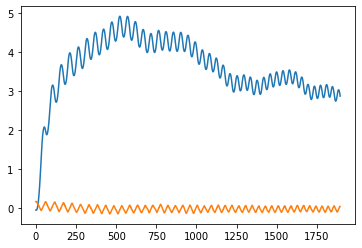

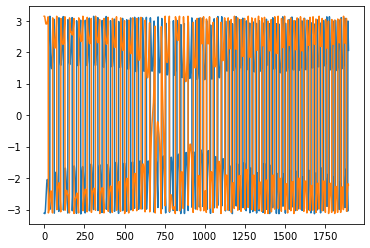

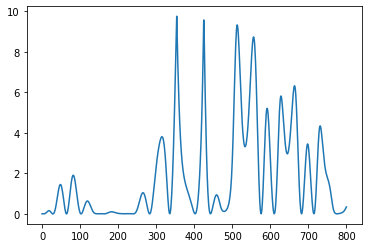

In [67]:
states = fun2([0.3, 0.2, 0.1, 1.2, 0.03, 0.1, 1, 0.05, 0.02])
plt.figure()
plt.plot(states[:,0])
plt.plot(x)
plt.figure()
plt.plot(states[:,3])
plt.plot(angle)
plt.figure()
plt.plot(loss_(pos))

In [61]:
fun2([0.3, 0.2, 0.1, 1.2, 0.03, 0.1, 1, 0.05, 0.02]).shape

(1895, 6)